# Homework 4 - UFOs!!!

The objective of this homework is to practice cleaning and transforming data. To successfully complete this homework, you may use any resources available to you. 

Get the `scrubbed.csv` data [here](https://www.kaggle.com/NUFORC/ufo-sightings/data). Develop **three** interesting insights into the UFO phenomenon. 
1. When and where do people see UFOs in California? 
2. Are there differences in the circumstances of UFO sightings across the U.S. states? (Explore the comment column)
3. What is the average length of UFO sightings across the U.S. states?

Hints:
* When you explore the comment column, think about the work we did on twitter. 
* For better performance, download the data to your local drive.
* Make reasonable assumptions when transforming the length data.

In [119]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [118]:
import warnings
warnings.filterwarnings('ignore')

##  Fetching raw data:<br>
- the csv file is imported

In [120]:
import pandas as pd
url_header = 'https://raw.githubusercontent.com/xiaoluzhang6/PythonDataScience/master/UFOstudy/'
ufo = pd.read_csv(url_header + 'ufos.csv')
ufo.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


### 1) When and where do people see UFOs in California?<br>
- There are 9655 counts of UFO sighting in California; most occuring city is Los Angeles with 352 sightings. The date with most sightings was 9/1/1999, 21:30, with 12 occurances.<br>
- This result is not suprising; Los Angele is the most densely populated city in California; 


In [121]:
ufo1 = ufo[['datetime', 'city', 'state']]


In [122]:
ufoCA = ufo1[ufo1.state == 'ca']
ufoCA['city'].describe()
ufoCA['datetime'].describe()

count            9655
unique           1806
top       los angeles
freq              352
Name: city, dtype: object

count               9655
unique              9280
top       9/1/1999 21:30
freq                  12
Name: datetime, dtype: object

### 2) Are there differences in the circumstances of UFO sightings across the U.S. states? (Explore the comment column)<br>
- A word cloud is created from the comments column; the most predominet words are "light", "sky" and various colors used to describe the lights. This tells us that most data were very similar in nature; most sightings are reported as lights across the sky in a particular color, and most had something(most likely reported to) to do with NUFORC (National UFO Reporting Center).<br>
- This result shows that the circumstances are similar in nature; people identified UFOs mostly as lights/objects in the sky.

In [126]:
from wordcloud import WordCloud


In [123]:
# Get all data from USA
ufoUS = ufo[ufo.country == 'us']

In [124]:
# join all strings in the column, no ints
values = ','.join(str(v) for v in ufoUS['comments'])


In [125]:
wordcloud1 = WordCloud().generate(values)

(-0.5, 399.5, 199.5, -0.5)

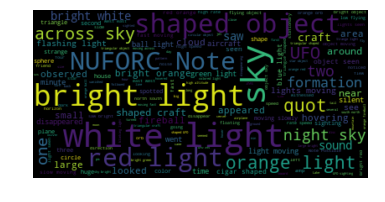

In [127]:
# Display the generated image:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


### 3) What is the average length of UFO sightings across the U.S. states?<br>
- because of a special character in the duration(seconds) column, mean could not be calculated directly<br>
- to remove the character, an str method needs to be used; so we first convert the duration column from 'float' to 'str' type, remove the special character that was causing the problem, and then convert back to float again to calculate the mean.


In [128]:
ufoUS['duration (seconds)'] = ufoUS['duration (seconds)'].astype(str).str.extract('(\d+)').astype(float)

In [129]:
ufoUS['duration (seconds)'].mean()

5800.0126240132695

### Sources:<br>
https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data -read csv file error fix<br><br>

https://stackoverflow.com/questions/35460075/how-to-remove-characters-from-floats. -remove string from floats<br><br>

https://stackoverflow.com/questions/10880813/typeerror-sequence-item-0-expected-string-int-found - joining strings<br><br>

https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe - word cloud<br>
